In [1]:
#!pip install sqlalchemy

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
from sqlalchemy import Column, Integer, String, Float

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [8]:
Base = automap_base()

In [9]:
Base.prepare(engine, reflect=True)

In [10]:
Base.classes.keys()

['measurement', 'station']

In [11]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# dir(Measurement)

In [13]:
#Create a session
session = Session(engine)

In [14]:
#Display row's columns and data in dictionary format for Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cfa7259c70>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08}

In [15]:
#Display row's columns and data in dictionary format for Station
first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cfa7266b20>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [16]:
#Use Session to query Station Table 
for row in session.query(Station.id, Station.station, Station.name, Station.longitude, Station.elevation, Station.latitude).limit(15).all():
    print(row)


(1, 'USC00519397', 'WAIKIKI 717.2, HI US', -157.8168, 3.0, 21.2716)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', -157.8015, 14.6, 21.4234)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 7.0, 21.5213)
(4, 'USC00517948', 'PEARL CITY, HI US', -157.9751, 11.9, 21.3934)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', -158.0111, 306.6, 21.4992)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139, 19.5, 21.33556)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', -157.84888999999998, 32.9, 21.45167)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', -157.9992, 0.9, 21.3152)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', -157.8025, 152.4, 21.3331)


In [17]:
conn = engine.connect()

# SQLAlchemy Homework

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [19]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = latest_date[0]
latest_date

'2017-08-23'

In [24]:
# Calculate the date 1 year ago from the last data point in the database

year_ago = (dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)).date()
precipitation_lastoneyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago). \
order_by(Measurement.date).all()
precipitation_lastoneyear

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [25]:
#query for API

tobs_dates = session.query(Measurement.date, Measurement.tobs).\
                  filter(Measurement.date >= year_ago).order_by(Measurement.date).all()

tobs_dates

[('2016-08-23', 81.0),
 ('2016-08-23', 76.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 77.0),
 ('2016-08-23', 74.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 79.0),
 ('2016-08-26', 78.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 84.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 77.0),
 ('2016-08-27', 73.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 75.0),
 ('2016-08-27', 74.0),
 ('2016-08-28', 78.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 71.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 80.0),
 ('2016-08-

In [26]:
#query for API

tobs_year = []

for data in tobs_dates:
        row = {}
        row["date"] = data[0]
        row["tobs"] = data[1]
        tobs_year.append(row)
        
tobs_year

[{'date': '2016-08-23', 'tobs': 81.0},
 {'date': '2016-08-23', 'tobs': 76.0},
 {'date': '2016-08-23', 'tobs': 80.0},
 {'date': '2016-08-23', 'tobs': 80.0},
 {'date': '2016-08-23', 'tobs': 80.0},
 {'date': '2016-08-23', 'tobs': 77.0},
 {'date': '2016-08-23', 'tobs': 74.0},
 {'date': '2016-08-24', 'tobs': 79.0},
 {'date': '2016-08-24', 'tobs': 76.0},
 {'date': '2016-08-24', 'tobs': 80.0},
 {'date': '2016-08-24', 'tobs': 78.0},
 {'date': '2016-08-24', 'tobs': 79.0},
 {'date': '2016-08-24', 'tobs': 77.0},
 {'date': '2016-08-24', 'tobs': 74.0},
 {'date': '2016-08-25', 'tobs': 80.0},
 {'date': '2016-08-25', 'tobs': 77.0},
 {'date': '2016-08-25', 'tobs': 81.0},
 {'date': '2016-08-25', 'tobs': 81.0},
 {'date': '2016-08-25', 'tobs': 80.0},
 {'date': '2016-08-25', 'tobs': 80.0},
 {'date': '2016-08-25', 'tobs': 77.0},
 {'date': '2016-08-26', 'tobs': 79.0},
 {'date': '2016-08-26', 'tobs': 78.0},
 {'date': '2016-08-26', 'tobs': 81.0},
 {'date': '2016-08-26', 'tobs': 81.0},
 {'date': '2016-08-26', '

In [27]:
year_ago

datetime.date(2016, 8, 23)

In [28]:
# Perform a query to retrieve the data and precipitation scores

prec_df = pd.DataFrame(precipitation_lastoneyear)
Precipitation_df = prec_df.rename(columns={"prcp":"Precipitation"})
Precipitation_df.head()


,date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column

Precipitation_df.set_index('date').head()


,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [30]:
# Sort the dataframe by date

prec_df["date"] = pd.to_datetime(prec_df["date"], format = "%Y-%m-%d")
prec_df.set_index('date',inplace=True)
prec_df_sort = prec_df.sort_values(['date'], ascending=True)
prec_df_sort

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


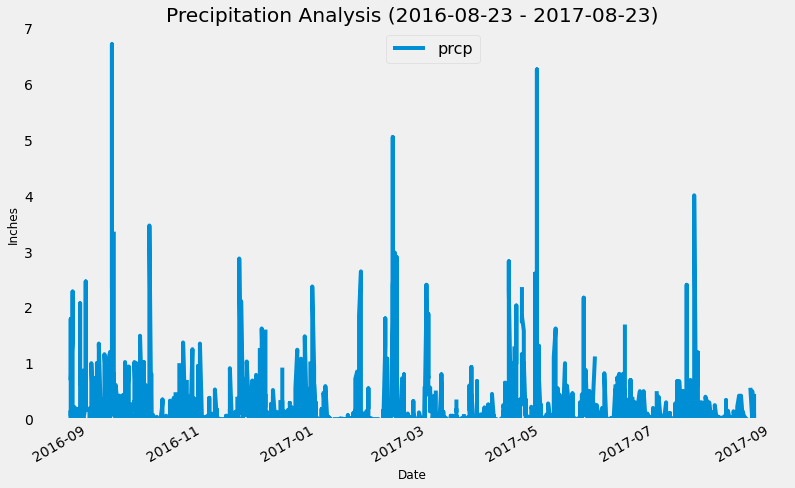

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = prec_df_sort.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(.6,1.001), fontsize="16")
ax.set_title(f"Precipitation Analysis ({(year_ago)} - {latest_date})")
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Inches", fontsize = 12)
plt.grid()
plt.ylim(0,7)
plt.savefig("PrecipitationAnalysis.png")
plt.show()



In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
# Design a query to show how many stations are available in this dataset?
stations_no = session.query(func.count(Station.station))
station_count = stations_no[0]
station_count

(9)

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestation = session.query(Measurement.station, func.count(Measurement.tobs))\
                .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in activestation:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_station_record = activestation[0][0]

calc = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == highest_station_record)
stats_list = list(calc)
print(stats_list)


[(54.0, 85.0, 71.66378066378067)]


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == highest_station_record).\
                filter(Measurement.date >= year_ago).all()
tobs_df = pd.DataFrame(tobs_data)
tobs_df.set_index('station', inplace=True)
tobs_df.head()


,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<function matplotlib.pyplot.show(*args, **kw)>

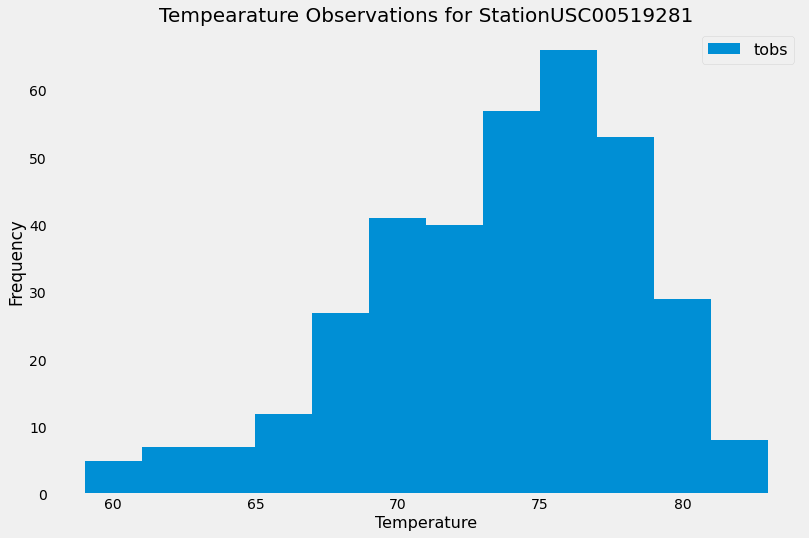

In [37]:
# Plot histogram for top station

tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Tempearature Observations for Station" + highest_station_record, fontsize=20)
plt.xlabel("Temperature", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("TopStationTemp.png")
plt.show

## Bonus Challenge Assignment

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2016-08-23', '2017-08-23')
trip

[(58.0, 74.59058295964125, 87.0)]

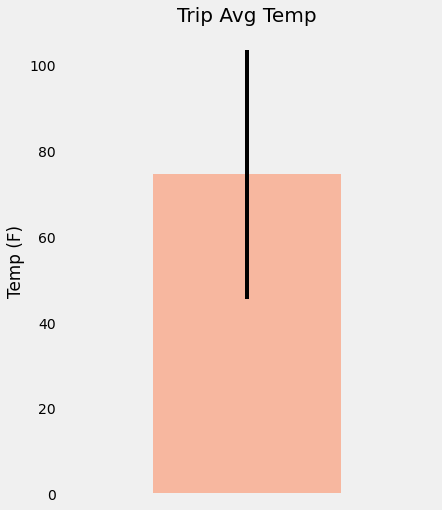

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("TripTempSummary.png")
plt.show()

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfallyear = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Measurement.prcp).filter(Measurement.date >= year_ago)\
                        .filter(Measurement.station == Station.station).group_by(Measurement.station).all()


rainfallyear_df = pd.DataFrame(rainfallyear, columns = ["Station", "Station Name", "Latidute", "Longitude", "Precipitation Total"])

rainfallyear_df = rainfallyear_df.dropna()

rainfallyear_df


,Station,Station Name,Latidute,Longitude,Precipitation Total
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,0.15
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,0.05
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,0.70
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,1.79
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,0.00
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,0.02


In [42]:
rainfall_df = pd.DataFrame

In [43]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [44]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [46]:
# Plot the daily normals as an area plot with `stacked=False`
